# 신경망의 구조

- 네트워크를 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 손실 함수
- 학습 진행 방식을 결정하는 옵티마이저

즉, 입력데이터가 층을 통과하여 예측값을 만들고,

예측값과 실제값의 차이를 비교하는 손실함수가 손실점수를 만들고,

손실점수를 옵티마이저가 반영하여 가중치를 업데이트한다.


#### 1. 층 : 딥러닝의 구성 단위

- (samples, features) 2D 텐서는 완전 연결층, 밀집 연결층으로 처리
- (samples, timesteps, features) 3D 텐서는 LSTM 같은 순환 층(recurrent layer)로 처리
- 이미지 데이터인 4D 텐서는 2D 합성곱 층에 의해 처리 (Conv2D)


첫 번째 차원이 784인 2D 텐서를 입력으로 받는 층
  - 784차원 벡터를 입력으로 받아 32차원으로 축소
  - 이 층은 최종 차원 크기가 10로 변환된 텐서를 출력한다. 
  
  

```
    from keras import layers
    from keras import models
    model = models.Sequential()
    model.add(layers.Dense(32, input_shape=(784,)))
    model.add(layers.Dense(10))
```



#### 2. 모델 : 층의 네트워크

딥러닝 모델은 층으로 만든 비순환 유향 그래프(Diredcted Acyclic Graph, DAG)이다.
- 가장 일반적인 예는 하나의 입력을 하나의 출력으로 매핑하여 층으로 쌓는 것.
- 자주 등장하는 네트워크 구조
  - 가지(branch)가 2개인 네트워크
  - 출력이 여러 개인 네트워크
  - 인셉션(Inception) 블록

네트워크 구조는 가설 공간(hypothesis space)을 정의한다.
- 딱 맞는 네트워크 구조를 찾아내는 연습이 필요!!!

#### 3. 손실함수와 옵티마이저 : 학습 과정을 조절하는 열쇠
- 손실함수(loss function) : 훈련하는 동안 최소화될 값
- 옵티마이저(optimizer) : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정
  - 확률적 경사 하강법(SGD)을 구현

여러개의 출력을 내는 신경망은, 여러개의 손실 함수를 가진다. but  경사 하강법 과정은 하나의 스칼라 손실 값을 기준으로 한다.
  - 따라서 손실이 여러 개인 네트워크는 **모든 손실의 평균**을 하나의 스칼라 양으로 합친다.

***  간단한 지침 ***

- 이진 크로스엔트로피(binary crossentropy) : 2개 클래스가 있는 분류 문제
- 범주형 크로스엔트로피(categorical crossentropy) : 여러 클래스가 있는 분류 문제
- 평균 제곱 오차 (MSE) : 회귀 문제
- CTC (Connectino Temporal Classification) : 시퀀스 학습 문제

# 케라스 소개
- 동일한 코드로 CPU, GPU 실행 가능
- 사용하기 쉬운 API
- 합성곱 신경망, 순환 신경망 지원
- 다중 입력, 다중 출력, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있음
  - 적대적 생성 신경망 (GAN)부터 뉴럴 튜링 머신까지 가능
- 파이썬 2.7 ~ 3.6 까지 호환
- Tensorflow, theano, CNTK 중 하나 선택하여 실행 가능

#### 모델 정의 방법
모델 구조가 결정된이후 2가지 방법 중 하나를 선택!!!
1. Sequential 클래스 (순서대로 쌓아 올린 클래스)
```
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(32,)))
model.add(layers.Dense(10, activation='softmax'))
```
2. 함수형 API ( 임의의 구조 만드는 비순환 유향 그래프)
```
input_tensor = layers.Input(shpae=(32,))
x=layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)
```

이후 컴파일 단계에서 학습과정 설정
```
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)
```

#### 딥러닝 컴퓨터 셋팅
- 닥치고 GPU
- UNIX 운영체제 추천

## 분류 문제

### 영화 리뷰 분류 : 이진 분류 예제
- IMDB 데이터셋 활용
  - 훈련 Data 2.5만 , 테스트 Data 2.5만
  - 모델은 새로운 데이터에 대한 성능이 중요

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

max([max(sequence) for sequence in train_data])

17473536/17464789 [==============================] - 0s 0us/step


9999

In [ ]:
# word_index 는 단어, 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index() 
# 정수 인덱스가 단어를 매핑하도록 뒤집어준다.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

#### 데이터 준비
- 신경망에 숫자 리스트를 주입할 수 없다. 리스트를 텐서로 바꾸는 방법
  1. 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환하여, 신경망의 첫 번째 층으로 사용한다 (embedding 층)
  2. 리스트를 원-핫 인코딩하여 0,1 벡터로 변환하여 Dense층을 신경망의 첫번째 층으로 사용

In [ ]:
# 2번째 방법 사용
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # 크기가 len(sequences)이고 모든 원소가 0인 리스트
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # results[i] 에서 특정 인덱스의 위치를 1로 만들기
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



[0. 1. 1. ... 0. 0. 0.]


#### 신경망 모델 만들기
입력 데이터가 벡터, 레이블은 스칼라(1 또는 0)

Dense(16)
- 16 : 은닉유닛
  - 표현 공간에서 하나의 차원


ouput = relu(dot(W,input) + b)
- 가중치 행렬 W 의 크기가 (input_dimension, 16) 이라는 뜻
- 입력데이터와 W가 점곱하면 16차원의 공간으로 투영되고, 편향벡터 b 를 더해준다
- 은닉유닛을 늘리면, 복잡한 표현이 가능하지만
- 계산 비용이 커지고 원하지 않는 패턴을 학습할 가능성이 있다.

2 가지 중요한 구조상의 결정 필요
- 얼마나 많은 층을 사용할 것인가?
- 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# optimizer 방법 1
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# optimizer 방법 2
from tensorflow.keras.optimizers import RMSprop
from keras import losses
from keras import metrics
model.compile(optimizer=RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# 검증 데이터 10,000 개 만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5031 - accuracy: 0.7884 - val_loss: 0.3746 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2978 - accuracy: 0.9033 - val_loss: 0.3025 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2165 - accuracy: 0.9281 - val_loss: 0.2757 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1667 - accuracy: 0.9455 - val_loss: 0.3074 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1375 - accuracy: 0.9569 - val_loss: 0.2871 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1117 - accuracy: 0.9657 - val_loss: 0.3009 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0919 - accuracy: 0.9743 - val_loss: 0.3400 - val_accuracy: 0.8759
Epoch 8/20
30

#### model.fit() 메서드는 History 객체를 반환한다
- 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있다.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

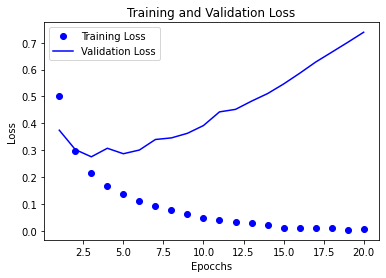

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epocchs")
plt.ylabel("Loss")
plt.legend()

plt.show()

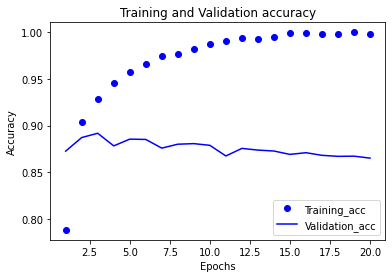

In [ ]:
plt.clf() # 그래프 초기화

acc=history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results
# loss, accuracy

Epoch 1/4
49/49 [==============================] - 3s 45ms/step - loss: 0.1323 - acc: 0.8242
Epoch 2/4
49/49 [==============================] - 2s 45ms/step - loss: 0.0714 - acc: 0.9152
Epoch 3/4
49/49 [==============================] - 2s 46ms/step - loss: 0.0563 - acc: 0.9322
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0878 - acc: 0.8802


[0.08782418072223663, 0.8802000284194946]

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4720 - acc: 0.8095
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2687 - acc: 0.9054
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2076 - acc: 0.9269
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2888 - acc: 0.8852


In [ ]:
results
# loss, accuracy

[0.28879451751708984, 0.8851600289344788]

#### 훈련된 모델로 예측하기

In [ ]:
model.predict(x_test)

array([[0.20338166],
       [0.999953  ],
       [0.94608235],
       ...,
       [0.13665274],
       [0.10261494],
       [0.6919189 ]], dtype=float32)

### 뉴스 기사 분류 : 다중 분류 문제 

- 2개 이상의 클래스가 있는 경우!
- 다중 레이블 다중 분류

In [ ]:
# 로이터 데이터셋
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))

2121728/2110848 [==============================] - 0s 0us/step
8982
2246


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
                                                # 0,1,2는 패딩, 문서시작, 사전에 없음을 위한 인덱스임, 따라서 3을 빼줌
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

train_labels[10]

565248/550378 [==============================] - 0s 0us/step


3

In [ ]:
# 데이터 준비
## 벡터화
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
## 원 핫 인코딩
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label]=1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# 검증 데이터 구성
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
# 모델 훈련
history = model.fit(partial_x_train, partial_y_train, epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test,one_hot_test_labels)
results

Epoch 1/10
16/16 [==============================] - 1s 55ms/step - loss: 0.2017 - acc: 0.9488 - val_loss: 0.9618 - val_acc: 0.8100
Epoch 2/10
16/16 [==============================] - 1s 49ms/step - loss: 0.1821 - acc: 0.9499 - val_loss: 0.9589 - val_acc: 0.8180
Epoch 3/10
16/16 [==============================] - 1s 48ms/step - loss: 0.1618 - acc: 0.9530 - val_loss: 0.9919 - val_acc: 0.8150
Epoch 4/10
16/16 [==============================] - 1s 48ms/step - loss: 0.1463 - acc: 0.9529 - val_loss: 1.0047 - val_acc: 0.8130
Epoch 5/10
16/16 [==============================] - 1s 47ms/step - loss: 0.1373 - acc: 0.9572 - val_loss: 1.0331 - val_acc: 0.8060
Epoch 6/10
16/16 [==============================] - 1s 50ms/step - loss: 0.1303 - acc: 0.9563 - val_loss: 1.0443 - val_acc: 0.8040
Epoch 7/10
16/16 [==============================] - 1s 48ms/step - loss: 0.1248 - acc: 0.9584 - val_loss: 1.0528 - val_acc: 0.8170
Epoch 8/10
16/16 [==============================] - 1s 49ms/step - loss: 0.1191 - a

[1.2413434982299805, 0.7809438705444336]

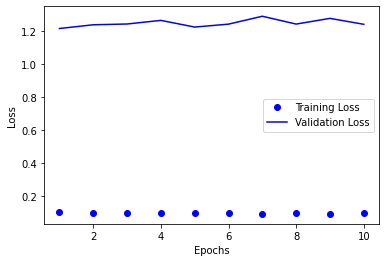

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

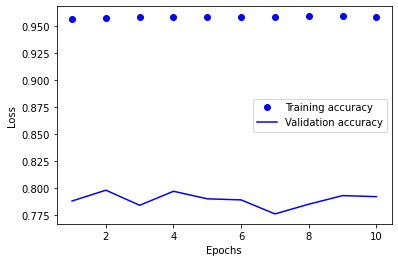

In [ ]:
plt.clf()

acc=history.history['acc']
val_acc=history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test)
# 예측 결과
print(predictions[0].shape)
# 예측의 합은 1이다
print(np.sum(predictions[0]))
# 가장 높은 확률의 클래스를 반환해준다
print(np.argmax(predictions[0]))

(46,)
1.0
3


*** 레이블 인코딩하는 다른 방법은 정수텐서로 변환하는 것 ***
- categorical_crossentropy 대신
- sparse_categorical_crossentropy 를 활용한다

#### 모델을 구성할 때 주의점
- 충분히 큰 중간층을 두어야 한다.
- 이전층보다 중간층이 크게 작을 경우, 중간층의 저차원 표현 공간에 압축되기 때문에, 정보 손실이 일어난다.

## 회귀문제
- 개별적인 레이블 대신, 연속적인 값을 예측하는 회귀(regression)

### 주택가격 예측

In [1]:
# 보스턴 주택 가격 데이터셋
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


#### 데이터 준비시 주의점
- 상이한 스케일을 가지는 경우
  - 특성별 정규화
  - 입력 데이터의 각 특성에서, 특성의 평균을 빼고 표준편차로 나눈다.
  - Train, Test는 각각 같은 스케일로 변환해야할 것

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [3]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense

def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

### 검증 방법 ( K-fold cross-validation)
- 데이터가 많이 없는 경우



In [ ]:
import numpy as np
k=4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
  print("처리중인 Fold", i)
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0)
  partial_train_target = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_target,
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

all_scores

처리중인 Fold 0
처리중인 Fold 1
처리중인 Fold 2
처리중인 Fold 3


[2.3892111778259277, 2.436007261276245, 2.7813668251037598, 2.53469181060791]

In [7]:
import numpy as np
i=0
num_val_samples = len(train_data)//4
val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

partial_train_data = np.concatenate(
    [train_data[:i*num_val_samples],
      train_data[(i+1)*num_val_samples:]],
      axis=0)
partial_train_target = np.concatenate(
    [train_targets[:i*num_val_samples],
      train_targets[(i+1)*num_val_samples:]],
      axis=0)

model = build_model()
history = model.fit(partial_train_data, partial_train_target,
                    validation_data=(val_data, val_targets),
          epochs=10, batch_size=1, verbose=0)

In [8]:

history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [9]:
import numpy as np
k=4
num_val_samples = len(train_data)//k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print("처리중인 Fold", i)
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0)
  partial_train_target = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_target,
                      validation_data=(val_data, val_targets),
            epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

처리중인 Fold 0
처리중인 Fold 1
처리중인 Fold 2
처리중인 Fold 3


In [10]:
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

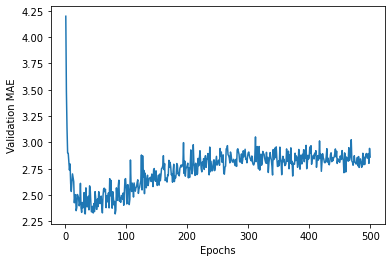

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel("Validation MAE")
plt.show()


#### 지수 이동 평균 법 (부드러운 곡선 얻기)
- 이전에 계산된 이동 평균에 factor를 곱하고, 현재 포인트에 (1-factor)를 곱하여 합산

In [16]:
def smooth_curve(points, factor=0.9):
  smoothed_points= []
  for point in points:
    if smoothed_points :
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point *(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

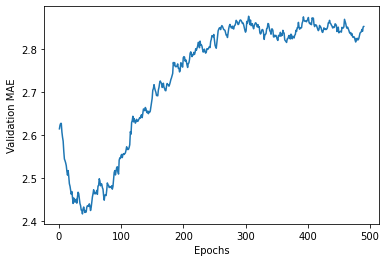

In [18]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
# 80번째 에포크 때부터 과대적합이 시작되는 것을 볼 수 있다.

In [19]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 18.7789 - mae: 2.7081


In [20]:
test_mae_score

2.708106517791748

## 요약
- 원본 데이터를 신경망에 주입하기 전, 전처리 해야한다!!
- 데이터에 범위가 다른 특성이 있다면, 전처리 단계에서 각 특성을 독립적으로 스케일 조정해준다!!
- 과대적합이 시작되면 나쁜 결과를 얻는다!!
- 훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개,2개의 은닉 층을 가진 신경망을 사용한다
- 데이터가 많은 범주로 나뉘어있을 때 중간층이 너무 작으면 정보의 병목이 생긴다.
- 회귀는 분류와 다른 손실 함수 (mae,mse // binary_crossentropy) 와 평가 지표를 사용한다
- 적은 데이터일 때 k-겹 검증을 활용해 신뢰 가능한 모델을 만든다.